In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import string
from collections import Counter

In [ ]:
def yapayZekaOdevi(population_size, N, mutation_rate_global, num_generations):
    # Dosya yolu
    pos_dir = "/content/drive/MyDrive/20news/20news_dataset50/med"
    neg_dir = "/content/drive/MyDrive/20news/20news_dataset50/politics_guns"

    # pozitif veriler
    pos_files = os.listdir(pos_dir)

    # negatif veriler
    neg_files = os.listdir(neg_dir)

    # hiper parametreler
    tournament_size = 5

    # kelimeleri pozitif ve negatif olarak ayır
    # pos_words = []
    # neg_words = []
    words_total = []
    for file_name in pos_files:
        file_path = os.path.join(pos_dir, file_name)
        with open(file_path, "r") as f:
            words = f.read().lower().split()
            words_total.extend([word for word in words if word not in string.punctuation and not word.isspace()])
    for file_name in neg_files:
        file_path = os.path.join(neg_dir, file_name)
        with open(file_path, "r") as f:
            words = f.read().lower().split()
            words_total.extend([word for word in words if word not in string.punctuation and not word.isspace()])

    # Kelime frekanslarını hesapla
    word_freq = Counter(words_total)

    # En yüksek frekansa sahip 1000 kelimeyi al
    top_words = [word for word, _ in word_freq.most_common(1000)]
    print(top_words)



    # words_total'daki 1000 kelimeyi içermeyen kelimeleri filtrele
    #filtered_words = [word for word in words_total if word not in top_words]

    #filtered_words = [word for word in words_total if word not in top_words and not any(c.isdigit() or c in string.punctuation or c in string.punctuation for c in word)]

    filtered_words = list(set([word for word in words_total if word not in top_words and not any(c.isdigit() or c in string.punctuation or c in string.punctuation for c in word)]))

    data = []
    labels = []

    # pozitif veri örnekleri
    for filename in os.listdir(pos_dir):
        with open(os.path.join("/content/drive/MyDrive/20news/20news_dataset50/med", filename), 'r', encoding="utf8") as f:
            text = f.read().translate(str.maketrans('', '', string.punctuation))
            data.append(text)
            labels.append(1)

    # negatif veri örnekleri
    for filename in os.listdir(neg_dir):
        with open(os.path.join("/content/drive/MyDrive/20news/20news_dataset50/politics_guns", filename), 'r', encoding="utf8") as f:
            text = f.read().translate(str.maketrans('', '', string.punctuation))
            data.append(text)
            labels.append(0)


    # bireylerin genlerini oluştur
    def create_genes():
        genes = []
        for i in range(N):
            genes.append(random.choice(filtered_words))
        return genes

    # sınıflandırma fonksiyonu
    def classify(genes,datas):

        pos_count = 0
        neg_count = 0

        for i in range(N):
            for j in range(len(datas)):
                if genes[i]==datas[j] and i < N/2:
                    pos_count += 1
                if genes[i]==datas[j] and i > N/2-1:
                    neg_count += 1

        if (pos_count > neg_count):
            return 1
        elif(pos_count < neg_count):
            return 0
        else:
            return random.randint(0,1)

    # uygunluk fonksiyonu
    def fitness(genes):
        correct_count = 0
        for i in range(len(data)):
            if classify(genes,data[i]) == labels[i]:
                correct_count += 1
        return correct_count / len(data)

    # çaprazlama fonksiyonu
    def crossover(parent1, parent2):
        crossover_point = random.randint(1, N-1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2

    # mutasyon fonksiyonu
    def mutate(genes, mutation_rate):
        for i in range(len(genes)):
            if random.random() < mutation_rate:
                genes[i] = random.choice(filtered_words)
        return genes

    def plot_stats(best_fitness_values,fitness_history,x):
        """Plot the best and average fitness values across generations."""

        plt.plot(x,best_fitness_values, label='Best fitness')
        plt.plot(x,fitness_history, label='Generation Average')

        plt.xlabel('Generation')
        plt.ylabel('Fitness')

        plt.show()

    # genetik algoritma
    def genetic_algorithm():
        population = [create_genes() for _ in range(population_size)]
        global mutation_rate
        mutation_rate = mutation_rate_global

        fitness_history = []
        best_fitness_history = []

        avr = 0
        x = []
        k = 0

        for i in range(num_generations):
            # uygunluk değerlerini hesapla ve sırala
            fitnesses = [(genes, fitness(genes)) for genes in population]
            fitnesses = sorted(fitnesses, key=lambda x: x[1], reverse=True)
            sum = 0
            #jenerasyonun ortalamasını hesapla
            for m in range(population_size):
                sum = sum + fitnesses[m][1]
            avr = sum/population_size

            # en iyi bireyleri seç
            top_individuals = [fitnesses[j][0] for j in range(tournament_size)]

            # yeni popülasyonu oluştur
            new_population = []

            for j in range(population_size - tournament_size):
                parent1, parent2 = random.choices(top_individuals, k=2)
                child1, child2 = crossover(parent1, parent2)
                child1 = mutate(child1, mutation_rate)
                child2 = mutate(child2, mutation_rate)
                new_population.append(child1)
                new_population.append(child2)
            new_population.append(top_individuals)
            population = new_population

            # en iyi bireyin uygunluğunu ve genlerini yazdır
            best_individual = fitnesses[0][0]
            best_fitness = fitnesses[0][1]
            print(f"Generation {i+1} Best Fitness: {best_fitness} Genes: {best_individual}")

            # uygunluk ve en iyi uygunluğu kaydet
            fitness_history.append(avr)
            best_fitness_history.extend(best_fitness)
            x.append(i+1)

            mutation_rate = mutation_rate_global

            if(k <= 5):
                a = 0

            #elif(k >= 5 and k < num_generations/2):
                #mutation_rate = mutation_rate * 0.5

            else:
                mutation_rate = mutation_rate * 0.3

            k = k + 1
            print(mutation_rate)

        # sonuçları gösteren fonksiyon çağrıları
        plot_stats(best_fitness_history,fitness_history,x)
        return

    genetic_algorithm()


Popülasyon büyüklüğünü girin: 30
Jenerasyon sayısını girin: 10
Mutasyon oranını girin: 0.5
Gen sayısını girin: 10
['the', 'of', 'to', 'a', 'and', 'in', 'that', 'is', 'i', 'you', 'for', 'it', 'have', 'are', 'as', 'not', 'this', 'be', 'on', 'was', 'with', 'they', 'if', 'or', 'by', 'but', 'my', 'from:', 'subject:', 'an', 'what', 'from', '|>', 'at', 'your', 'writes:', 'article', 're:', 'there', 'about', 'would', 'like', '>>', 'do', 'one', 'can', 'who', "don't", 'no', 'cancer', '--', 'been', 'had', 'were', 'has', 'any', 'some', 'all', 'will', 'more', 'we', 'get', 'people', 'their', 'other', 'out', "i'm", 'gun', 'medical', 'which', 'so', 'just', 'when', 'only', 'should', 'know', 'new', 'center', 'also', 'he', 'research', 'very', 'because', 'think', 'these', 'could', 'then', 'than', 'university', 'those', 'many', 'may', 'them', 'it.', 'use', 'most', 'me', 'up', 'after', "it's", 'even', 'first', 'did', 'guns', 'how', 'make', 'into', 'number', 'said', 'such', 'good', 'his', 'am', 'being', 'some

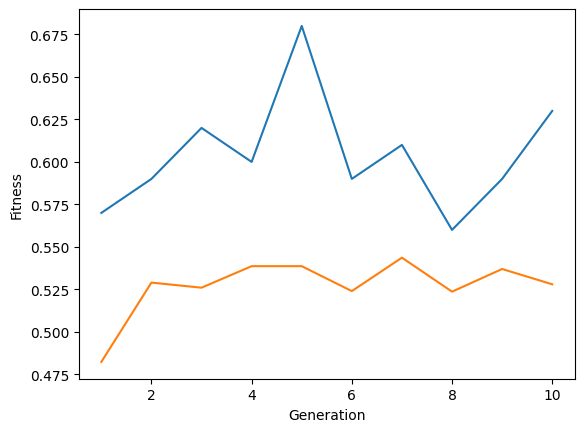

In [ ]:
population_size = int(input("Popülasyon büyüklüğünü girin: "))
num_generations = int(input("Jenerasyon sayısını girin: "))
mutation_rate_global = float(input("Mutasyon oranını girin: "))
N = int(input("Gen sayısını girin: "))

yapayZekaOdevi(population_size, N, mutation_rate_global, num_generations)

Popülasyon büyüklüğünü girin: 50
Jenerasyon sayısını girin: 10
Mutasyon oranını girin: 0.5
Gen sayısını girin: 6
['the', 'of', 'to', 'a', 'and', 'in', 'that', 'is', 'i', 'you', 'for', 'it', 'have', 'are', 'as', 'not', 'this', 'be', 'on', 'was', 'with', 'they', 'if', 'or', 'by', 'but', 'my', 'from:', 'subject:', 'an', 'what', 'from', '|>', 'at', 'your', 'writes:', 'article', 're:', 'there', 'about', 'would', 'like', '>>', 'do', 'one', 'can', 'who', "don't", 'no', 'cancer', '--', 'been', 'had', 'were', 'has', 'any', 'some', 'all', 'will', 'more', 'we', 'get', 'people', 'their', 'other', 'out', "i'm", 'gun', 'medical', 'which', 'so', 'just', 'when', 'only', 'should', 'know', 'new', 'center', 'also', 'he', 'research', 'very', 'because', 'think', 'these', 'could', 'then', 'than', 'university', 'those', 'many', 'may', 'them', 'it.', 'use', 'most', 'me', 'up', 'after', "it's", 'even', 'first', 'did', 'guns', 'how', 'make', 'into', 'number', 'said', 'such', 'good', 'his', 'am', 'being', 'somet

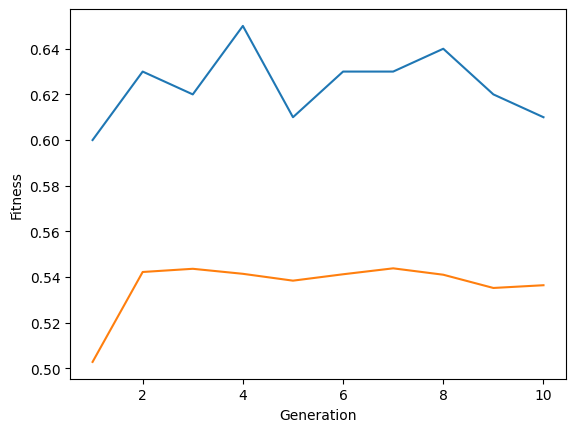

In [ ]:
population_size = int(input("Popülasyon büyüklüğünü girin: "))
num_generations = int(input("Jenerasyon sayısını girin: "))
mutation_rate_global = float(input("Mutasyon oranını girin: "))
N = int(input("Gen sayısını girin: "))

yapayZekaOdevi(population_size, N, mutation_rate_global, num_generations)

Popülasyon büyüklüğünü girin: 30
Jenerasyon sayısını girin: 10
Mutasyon oranını girin: 0.5
Gen sayısını girin: 10
['the', 'of', 'to', 'a', 'and', 'in', 'that', 'is', 'i', 'you', 'for', 'it', 'have', 'are', 'as', 'not', 'this', 'be', 'on', 'was', 'with', 'they', 'if', 'or', 'by', 'but', 'my', 'from:', 'subject:', 'an', 'what', 'from', '|>', 'at', 'your', 'writes:', 'article', 're:', 'there', 'about', 'would', 'like', '>>', 'do', 'one', 'can', 'who', "don't", 'no', 'cancer', '--', 'been', 'had', 'were', 'has', 'any', 'some', 'all', 'will', 'more', 'we', 'get', 'people', 'their', 'other', 'out', "i'm", 'gun', 'medical', 'which', 'so', 'just', 'when', 'only', 'should', 'know', 'new', 'center', 'also', 'he', 'research', 'very', 'because', 'think', 'these', 'could', 'then', 'than', 'university', 'those', 'many', 'may', 'them', 'it.', 'use', 'most', 'me', 'up', 'after', "it's", 'even', 'first', 'did', 'guns', 'how', 'make', 'into', 'number', 'said', 'such', 'good', 'his', 'am', 'being', 'some

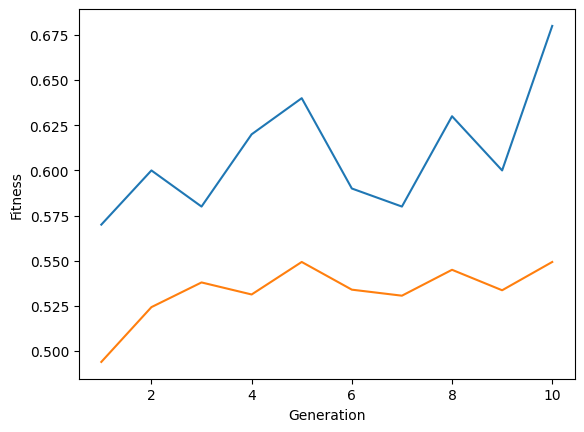

In [ ]:
population_size = int(input("Popülasyon büyüklüğünü girin: "))
num_generations = int(input("Jenerasyon sayısını girin: "))
mutation_rate_global = float(input("Mutasyon oranını girin: "))
N = int(input("Gen sayısını girin: "))

yapayZekaOdevi(population_size, N, mutation_rate_global, num_generations)